### Data Source: Bank Customer Churn

Explore the Bank Customer Churn dataset containing account information for 10,000 customers at a European bank. This dataset is ideal for customer churn analysis and predictive modeling.

- **Features**: Customer details such as credit score, balance, number of products, and churn status.
- **Format**: CSV
- **Size**: 1.6 MB

[Download the dataset](https://mavenanalytics.io/data-playground)


In [52]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
# Reading the dataset
import pandas as pd
import numpy as np
bank=pd.read_csv("E:\Downloads\Bank+Customer+Churn\Bank_Churn.csv", encoding='latin')
print('Shape before deleting duplicate values:', bank.shape)

# Removing duplicate rows if any
bank=bank.drop_duplicates()
print('Shape After deleting duplicate values:', bank.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
bank.head(10)

Shape before deleting duplicate values: (10000, 13)
Shape After deleting duplicate values: (10000, 13)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<Axes: xlabel='Exited'>

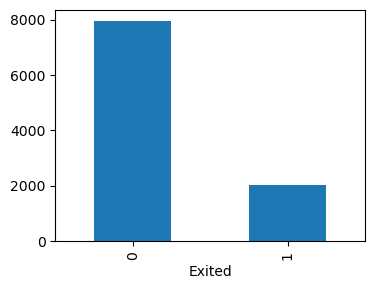

In [53]:
# Creating Bar chart as the Target variable is Categorical
GroupedData=bank.groupby('Exited').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [54]:
bank.describe(include="all")

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [55]:
bank.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# Basic Data Exploration Results

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regarding each column. Hence, creating an initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created.

* **CustomerId** : Qualitative. Rejected
* **Surname** : Qualitative. Rejected
* **CreditScore** : Continuous. Selected
* **Geography** : Categorical. Selected
* **Gender** : Categorical. Selected
* **Age** : Continuous. Selected
* **Tenure** : Categorical. Selected
* **Balance** : Continuous. Selected
* **NumOfProducts** : Categorical. Selected
* **IsActiveMember** : Categorical. Selected
* **HasCrCard** : Categorical. Selected
* **EstimatedSalary** : Continuous. Selected
* **Exited** : Categorical. Selected. This is the **Target Variable!**


# Removing useless columns from the data

In [56]:
Rejected_Col=["CustomerId","Surname"]
bank=bank.drop(columns=Rejected_Col,axis=1)
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted seven categorical predictors in the data

Categorical Predictors: 
"Geography","Gender","NumOfProducts","Tenure","NumOfProducts","HasCrCard","IsActiveMember"

We use bar charts to see how the data is distributed for these categorical columns.

In [57]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

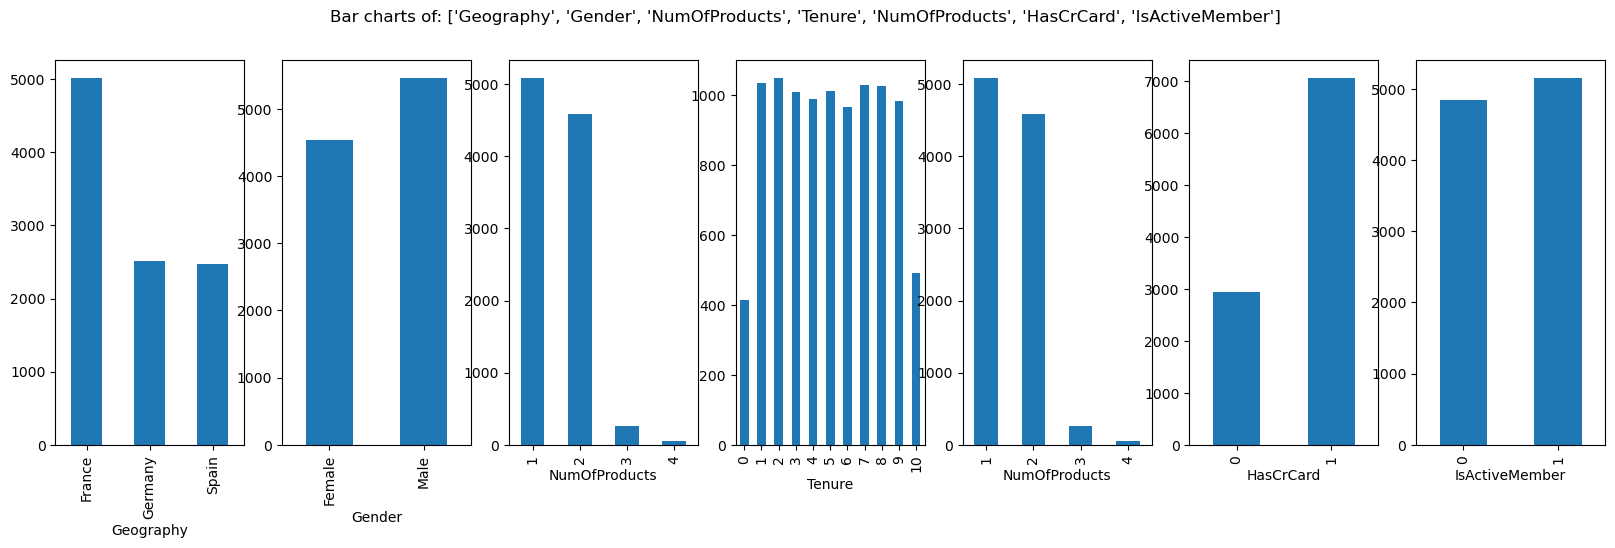

In [58]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=bank, colsToPlot=["Geography","Gender","NumOfProducts","Tenure","NumOfProducts","HasCrCard","IsActiveMember"])

In [59]:
bank.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

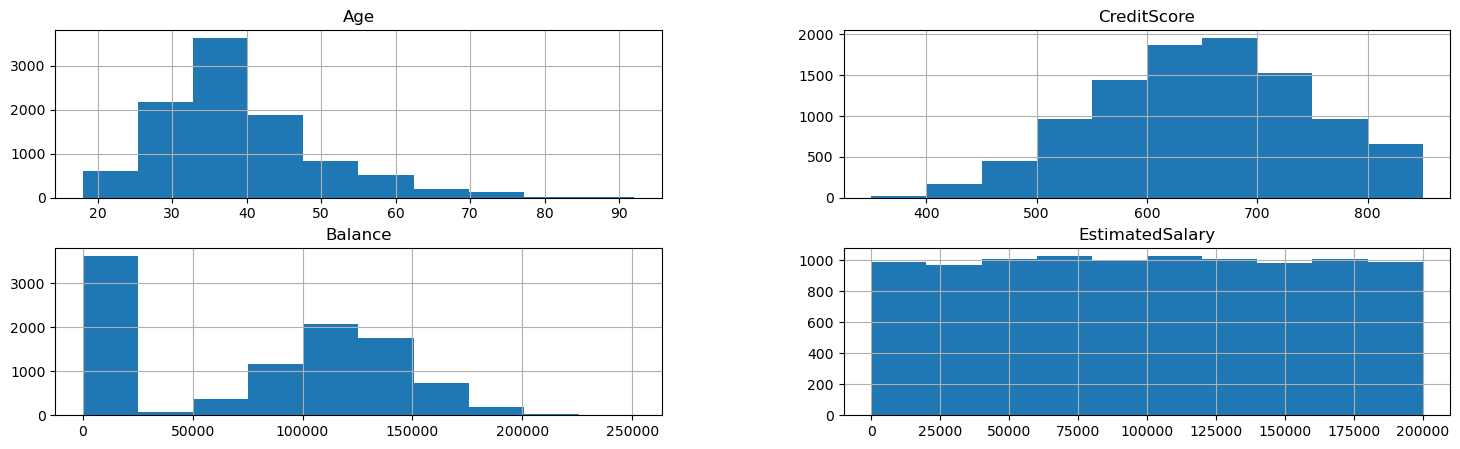

In [60]:
# Plotting histograms of multiple columns together
# Observe that Fare has outliers
bank.hist(['Age',"CreditScore","Balance","EstimatedSalary"], figsize=(18,5))


# There are no outlier present we can confirm that by exploring above histograms and bar plots.


## Missing value finding


In [61]:
bank.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

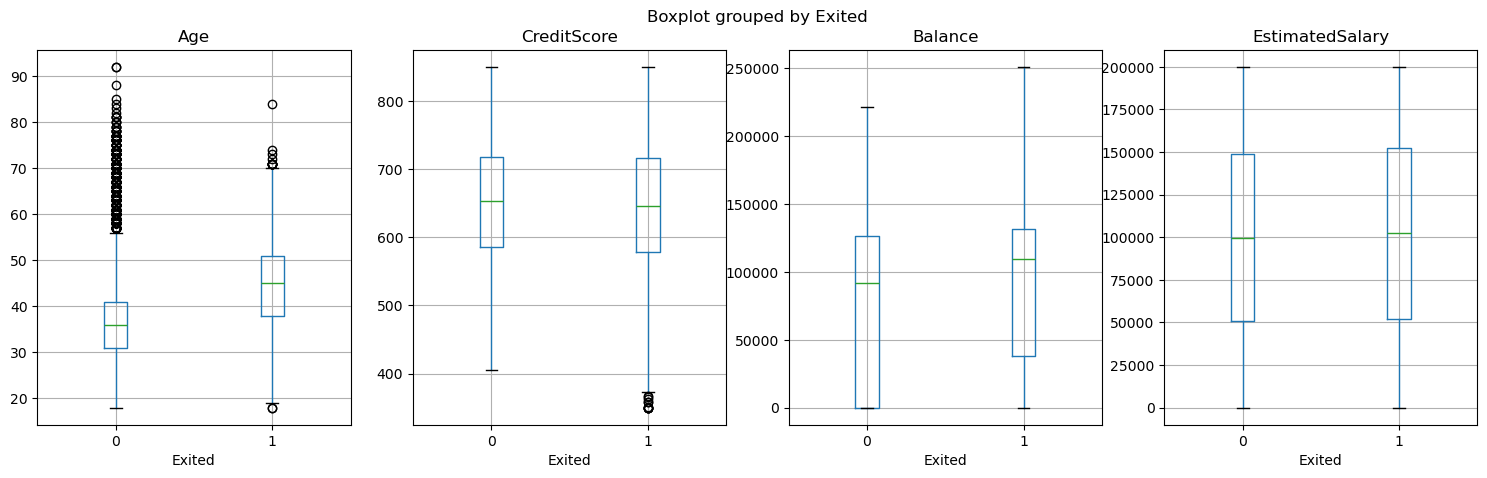

In [62]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['Age',"CreditScore","Balance","EstimatedSalary"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    bank.boxplot(column=PredictorCol, by='Exited', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [63]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [64]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Age',"CreditScore","Balance","EstimatedSalary"]
FunctionAnova(inpData=bank, TargetVariable='Exited', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age is correlated with Exited | P-Value: 1.2399313093445346e-186
CreditScore is correlated with Exited | P-Value: 0.006738213892205324
Balance is correlated with Exited | P-Value: 1.2755633191546494e-32
EstimatedSalary is NOT correlated with Exited | P-Value: 0.22644042802263928


['Age', 'CreditScore', 'Balance']

The results of ANOVA confirm our visual analysis using box plots above.

<b>Final selected Continuous columns:</b>

'Age', 'CreditScore', 'Balance'

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

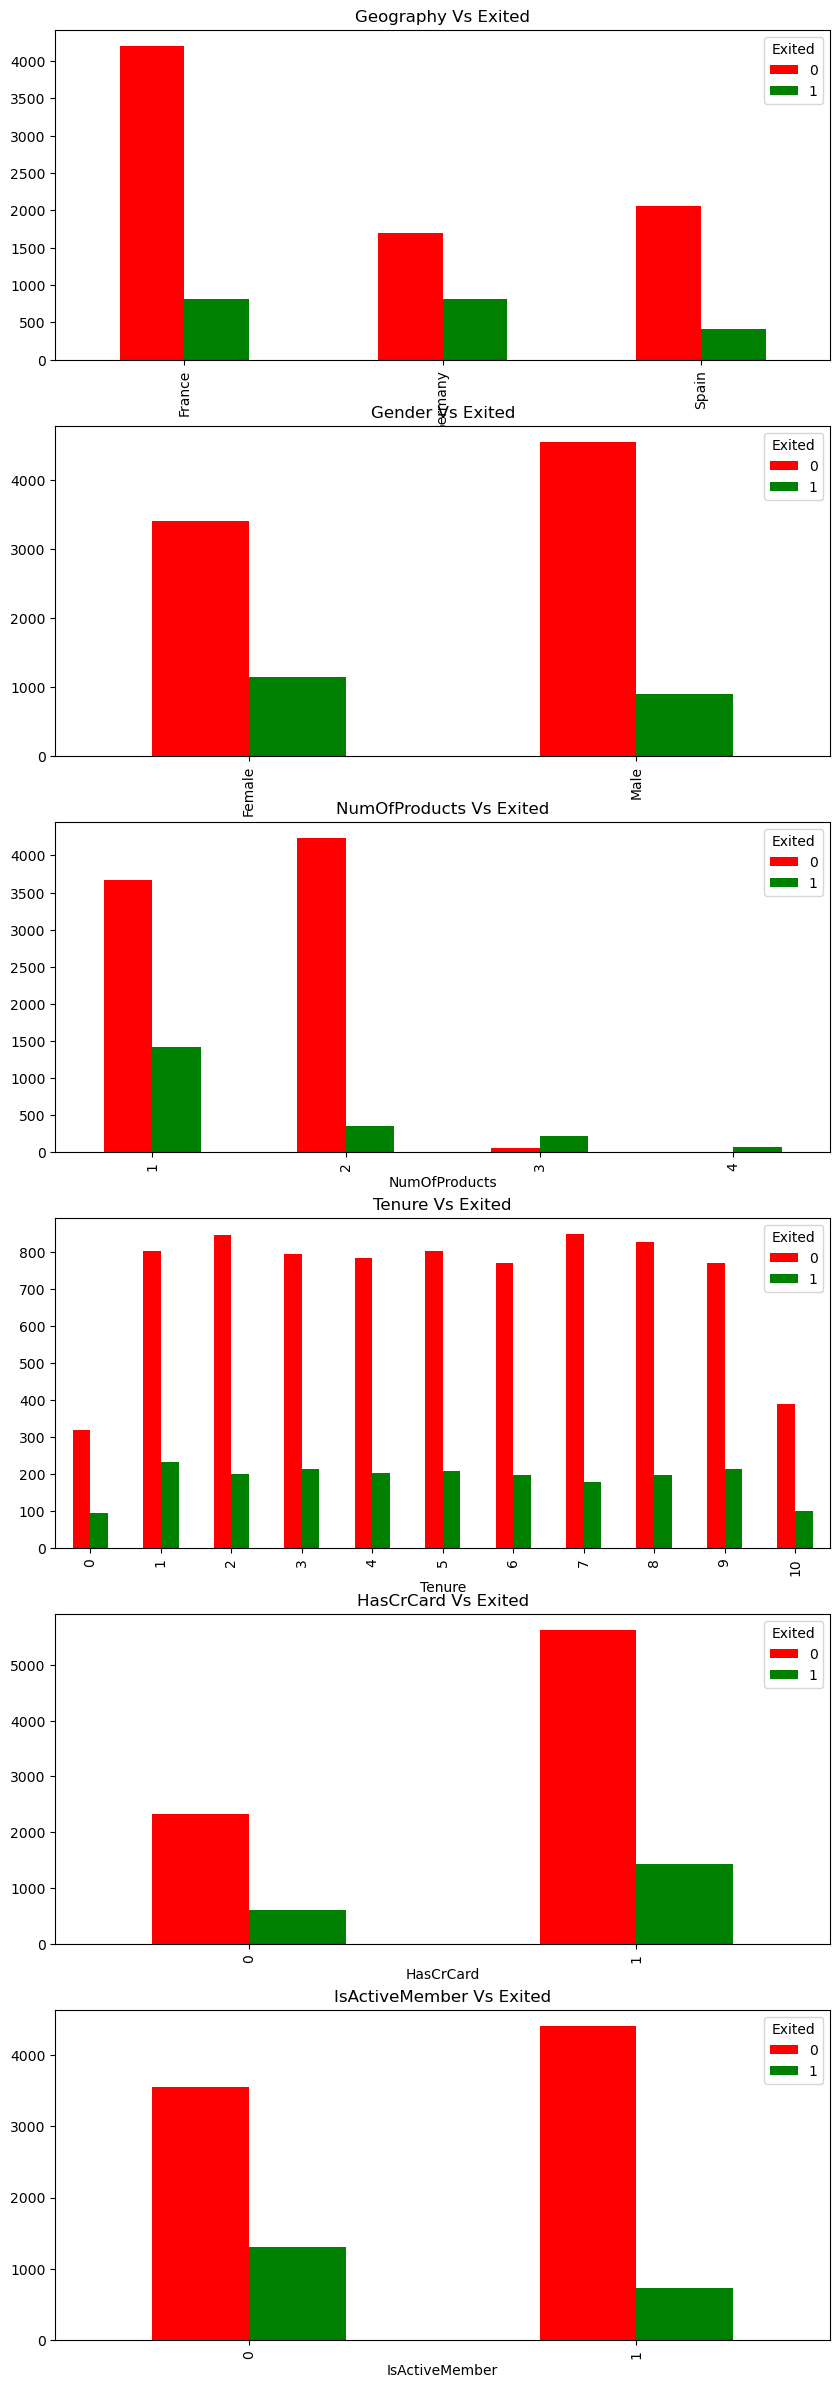

In [65]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=["Geography","Gender","NumOfProducts","Tenure","HasCrCard","IsActiveMember"]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Exited"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=bank[CategoricalCol], columns=bank['Exited'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Exited')

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [66]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [67]:
CategoricalVariables=["Geography","Gender","NumOfProducts","Tenure","HasCrCard","IsActiveMember"]

# Calling the function
FunctionChisq(inpData=bank, 
              TargetVariable='Exited',
              CategoricalVariablesList= CategoricalVariables)

Geography is correlated with Exited | P-Value: 3.830317605354266e-66
Gender is correlated with Exited | P-Value: 2.2482100097131755e-26
NumOfProducts is correlated with Exited | P-Value: 0.0
Tenure is NOT correlated with Exited | P-Value: 0.17758462026413294
HasCrCard is NOT correlated with Exited | P-Value: 0.49237236141554686
IsActiveMember is correlated with Exited | P-Value: 8.785858269303703e-55


['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember']

<b>Finally selected Categorical variables:</b>

'Geography', 'Gender', 'NumOfProducts', 'IsActiveMember'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [68]:
SelectedColumns=['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember','Age', 'CreditScore', 'Balance']

# Selecting final columns
DataForML=bank[SelectedColumns]
DataForML.head()

,Geography,Gender,NumOfProducts,IsActiveMember,Age,CreditScore,Balance
0,France,Female,1,1,42,619,0.00
1,Spain,Female,1,1,41,608,83807.86
2,France,Female,3,0,42,502,159660.80
3,France,Female,2,0,39,699,0.00
4,Spain,Female,1,1,43,850,125510.82


In [69]:
# Converting the binary nominal variable Gender to numeric
DataForML['Gender'].replace({'Female':0, 'Male':1}, inplace=True)

In [70]:
DataForML.head()

,Geography,Gender,NumOfProducts,IsActiveMember,Age,CreditScore,Balance
0,France,0,1,1,42,619,0.00
1,Spain,0,1,1,41,608,83807.86
2,France,0,3,0,42,502,159660.80
3,France,0,2,0,39,699,0.00
4,Spain,0,1,1,43,850,125510.82


## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()

In [71]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric = DataForML_Numeric.astype(int)

# Adding Target Variable to the data
DataForML_Numeric['Exited']=bank['Exited']

# Printing sample rows
DataForML_Numeric.head()

,Gender,NumOfProducts,IsActiveMember,Age,CreditScore,Balance,Geography_France,Geography_Germany,Geography_Spain,Exited
0,0,1,1,42,619,0,1,0,0,1
1,0,1,1,41,608,83807,0,0,1,0
2,0,3,0,42,502,159660,1,0,0,1
3,0,2,0,39,699,0,1,0,0,0
4,0,1,1,43,850,125510,0,0,1,0


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [72]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Gender', 'NumOfProducts', 'IsActiveMember', 'Age', 'CreditScore',
       'Balance', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Exited'],
      dtype='object')

In [73]:
# Separate Target Variable and Predictor Variables
TargetVariable="Exited"
Predictors=['Gender', 'NumOfProducts', 'IsActiveMember', 'Age', 'CreditScore','Balance', 'Geography_France', 'Geography_Germany', 'Geography_Spain']


X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [74]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 9)
(7000,)
(3000, 9)
(3000,)


# Logistic Regression

In [75]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2381
           1       0.61      0.21      0.32       619

    accuracy                           0.81      3000
   macro avg       0.72      0.59      0.60      3000
weighted avg       0.78      0.81      0.77      3000

[[2298   83]
 [ 487  132]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.7673211  0.76805212 0.77966204 0.76368134 0.76991376 0.76751475
 0.77992383 0.79697805 0.7713029  0.76604623]

Final Average Accuracy of the model: 0.77


# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2381
           1       0.86      0.24      0.37       619

    accuracy                           0.83      3000
   macro avg       0.85      0.61      0.64      3000
weighted avg       0.84      0.83      0.79      3000

[[2357   24]
 [ 472  147]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.80223391 0.78471521 0.82351734 0.78925229 0.81414751 0.78443291
 0.79002637 0.82682024 0.80275615 0.78554411]

Final Average Accuracy of the model: 0.8


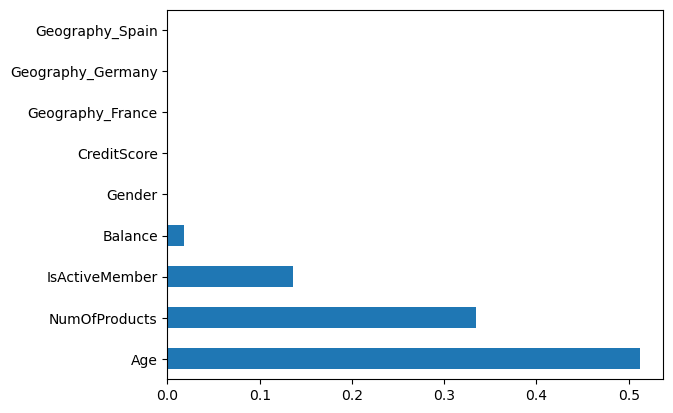

In [76]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

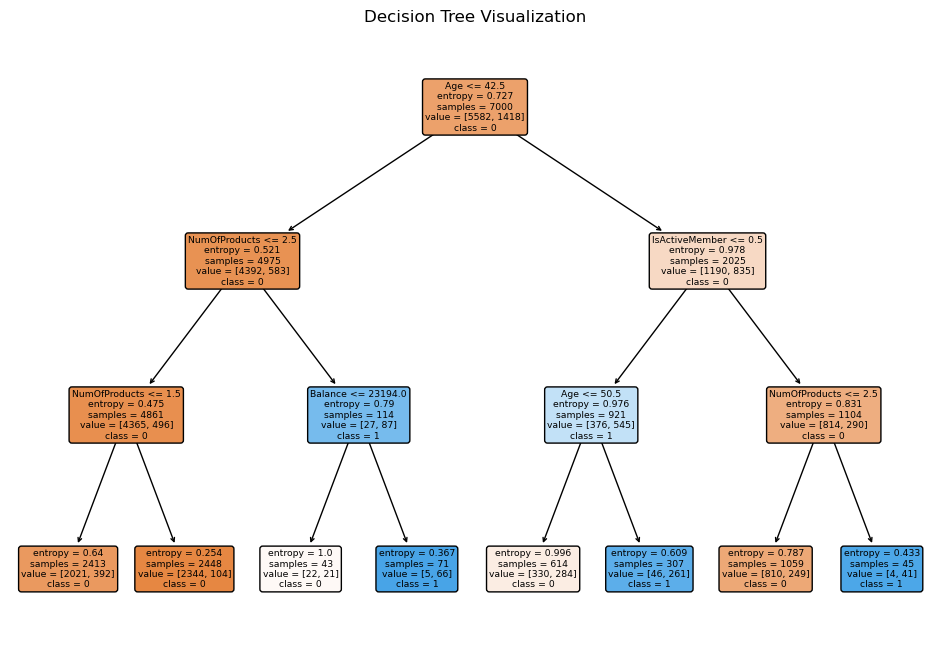

In [77]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(DTree, feature_names=Predictors, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Random Forest

RandomForestClassifier(max_depth=4, n_estimators=200)
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2381
           1       0.89      0.31      0.46       619

    accuracy                           0.85      3000
   macro avg       0.87      0.65      0.69      3000
weighted avg       0.85      0.85      0.82      3000

[[2356   25]
 [ 426  193]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation:
 [0.81278664 0.8062965  0.82606113 0.80710965 0.81914594 0.81003136
 0.82930024 0.84826855 0.8108429  0.80923333]

Final Average Accuracy of the model: 0.82


<Axes: >

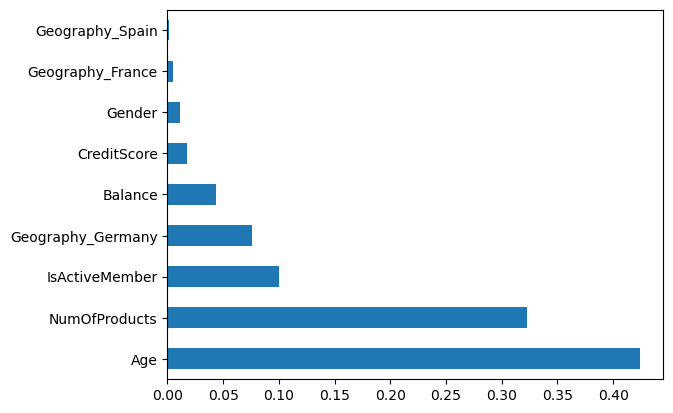

In [78]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

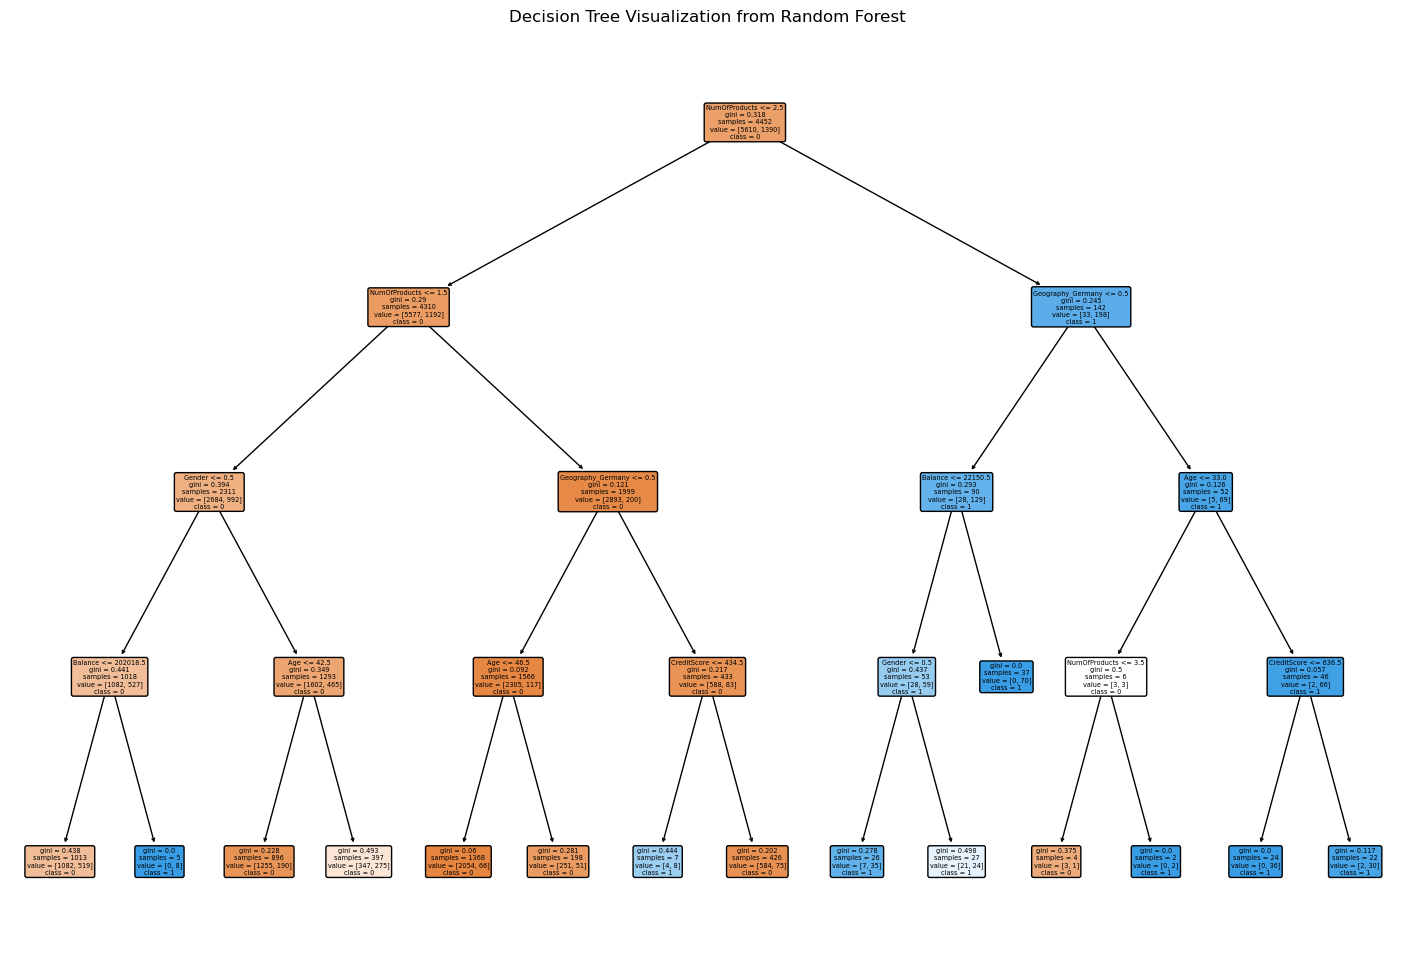

In [79]:
# Visualizing one of the trees in the Random Forest
plt.figure(figsize=(18, 12))
plot_tree(RF.estimators_[0], feature_names=Predictors, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Decision Tree Visualization from Random Forest")
plt.show()

# Deployment of the Model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing Random Forest as the final model since it is producing the best accuracy on this data.

In order to deploy the model we follow below steps

# Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'NumOfProducts', 'IsActiveMember', 'Age' and 'Balance'.

As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.


# Random Forest Model Development and Evaluation

This script performs the following tasks:
1. **Data Preparation**: Splits the dataset into training and testing sets.
2. **Initial Model Training**: Trains a Random Forest model on the initial training data.
3. **Faulty Row Identification**: Detects and removes rows where the model misclassifies.
4. **Final Model Training**: Re-trains the Random Forest model on the cleaned data.
5. **Model Evaluation**: Evaluates the model using accuracy, confusion matrix, and ROC AUC score.
6. **Visualization**: Generates plots for the ROC curve, confusion matrix, and feature importance.

The final Random Forest model is saved as a pickle file for future use.



Accuracy after removing faulty rows: 0.825
Final Random Forest model saved as 'final_rf_model_cleaned.pkl'.
Confusion Matrix:
 [[7762  201]
 [ 387 1650]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      7963
           1       0.89      0.81      0.85      2037

    accuracy                           0.94     10000
   macro avg       0.92      0.89      0.91     10000
weighted avg       0.94      0.94      0.94     10000

ROC AUC Score: 0.9


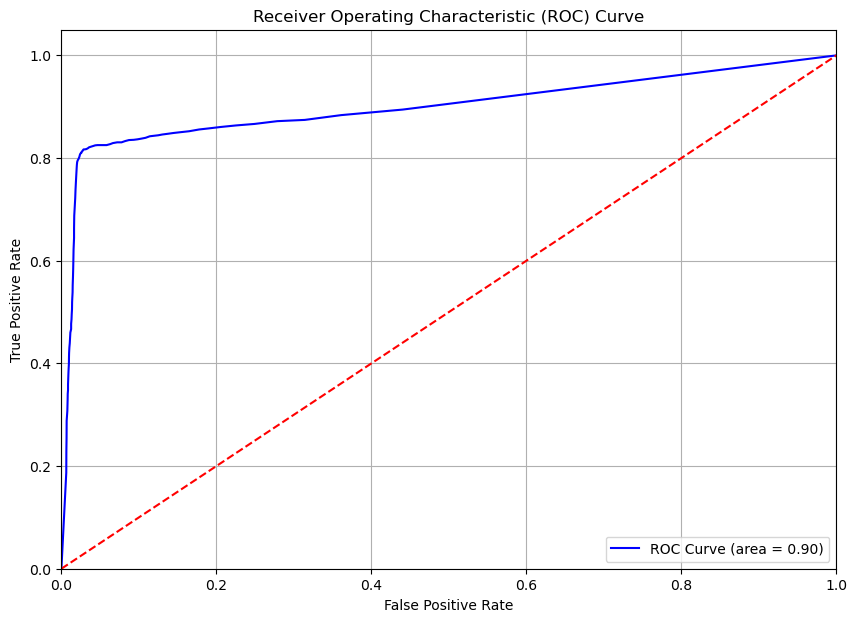

Confusion Matrix DataFrame:
             Predicted Not Exited  Predicted Exited
Not Exited                  7762               201
Exited                       387              1650


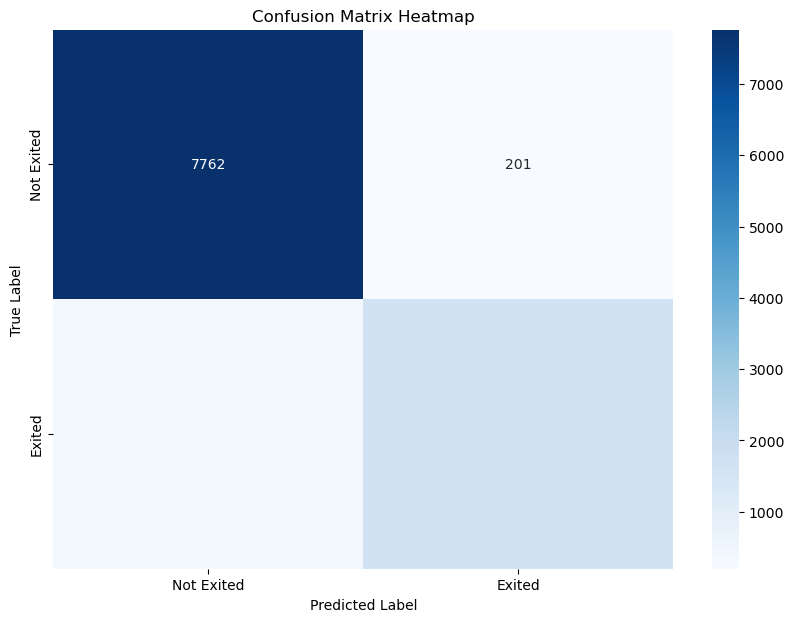

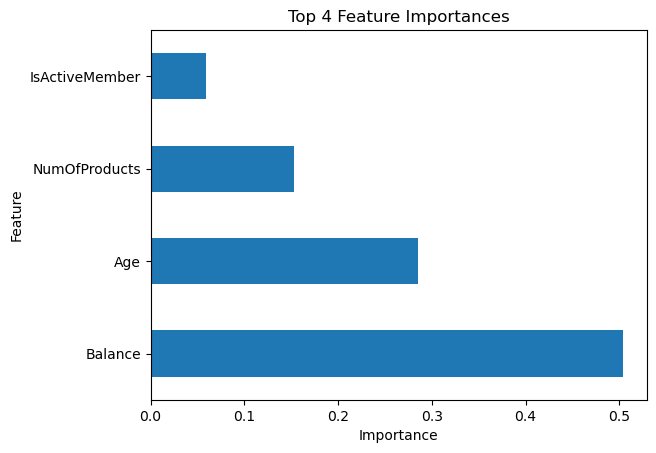

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
import pickle

# 1. Train the Random Forest Model on the initial training data
X = bank[['NumOfProducts', 'IsActiveMember', 'Age', 'Balance']]
y = bank['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Calculate Residuals (Misclassifications)
y_pred_train = rf_model.predict(X_train)
residuals = y_train - y_pred_train

# 3. Identify Faulty Rows based on Misclassifications
faulty_rows = residuals != 0  # Faulty if predicted incorrectly

# 4. Remove Faulty Rows
X_train_cleaned = X_train[~faulty_rows]
y_train_cleaned = y_train[~faulty_rows]

# 5. Re-train the Random Forest Model with Cleaned Data
rf_model_cleaned = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# 6. Evaluate the Model on the Test Set
y_pred_test = rf_model_cleaned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy after removing faulty rows:", accuracy)

# 7. Save the Final Model
with open('final_rf_model_cleaned.pkl', 'wb') as file:
    pickle.dump(rf_model_cleaned, file)

print("Final Random Forest model saved as 'final_rf_model_cleaned.pkl'.")

# Additional Evaluation and Visualization

# Step 1: Generating Predictions on the full dataset (for evaluation purposes)
y_pred_full = rf_model_cleaned.predict(X)
y_proba = rf_model_cleaned.predict_proba(X)[:, 1]

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_full)
print('Confusion Matrix:\n', conf_matrix)

# Step 3: Classification Report
class_report = classification_report(y, y_pred_full)
print('Classification Report:\n', class_report)

# Step 4: Calculating ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_proba)

# Step 5: Calculating AUC
auc_score = roc_auc_score(y, y_proba)
print('ROC AUC Score:', round(auc_score, 2))

# Step 6: Plotting ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 7: Confusion Matrix DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Not Exited', 'Exited'], columns=['Predicted Not Exited', 'Predicted Exited'])
print('Confusion Matrix DataFrame:\n', conf_matrix_df)

# Step 8: Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Exited', 'Exited'], 
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 9: Feature Importance
# Assuming Predictors is a list of your feature names
feature_importances = pd.Series(rf_model_cleaned.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 4 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
